# Problem A

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import random
import math
import sys

In [79]:
def hipergeometric(m, N, t, M):
    return scp.special.binom(M,m)*scp.special.binom(N-M,t-m)/scp.special.binom(N,t)

[28, 13, 23, 27, 39, 25, 19, 3, 30, 35, 8, 48, 38, 46, 32, 1, 0, 49, 4, 20]


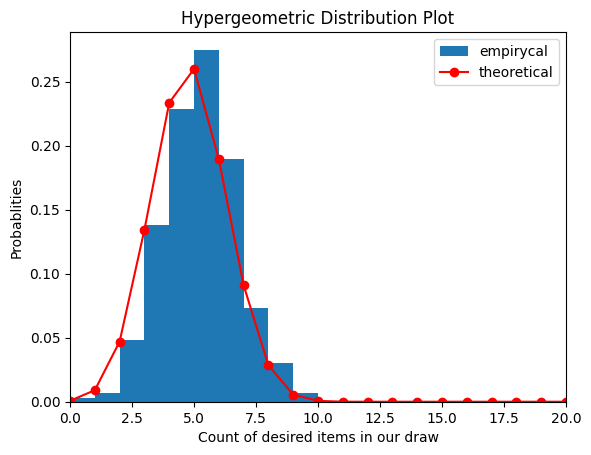

In [160]:
#M
samples = 1000

N = 50
M = 20
t = 12


labeled = random.sample(range(0, N), M)
unique_picks_empirycal = []
unique_picks_theoretical = []
print(labeled)

for i in range(0,samples):
    temp_ms = random.sample(range(0, N), t)
    #print("real:")
    #print(temp_ms)
    diff = np.setdiff1d(temp_ms, labeled)
    #print("diff:")
    #print(diff)
    unique_picks_empirycal.append(t - diff.size)

#print(unique_picks)
plt.hist(unique_picks_empirycal, density=True, label="empirycal")

x = range(N)
for m in x:
    unique_picks_theoretical.append(hipergeometric(m,N,t,M))

plt.plot(x, unique_picks_theoretical,'r-o', label='theoretical')


plt.legend()
plt.xlabel('Count of desired items in our draw')
plt.ylabel('Probablities')
plt.title('Hypergeometric Distribution Plot')
plt.xlim(0,20)
plt.show()

# Problem B

m: 0
t: 58
M: 58
m: 3
t: 53
M: 108
m: 1
t: 52
M: 159
m: 4
t: 45
M: 200
m: 4
t: 49
M: 245
m: 8
t: 46
M: 283
m: 10
t: 52
M: 325
m: 10
t: 50
M: 365
m: 15
t: 59
M: 409
m: 11
t: 50
M: 448


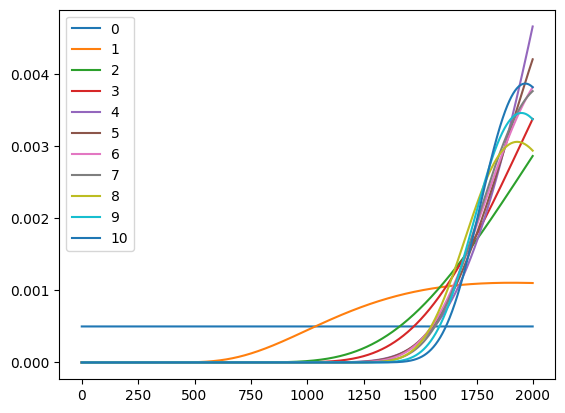

In [277]:
#Init
np.set_printoptions(threshold=sys.maxsize)

PNs = np.array([])
labeled = np.array([])
X = range(0,2000)

N = 1000
M = 0
t = 0
m = 0

PN = np.array([1/2000 for _ in X])

t = np.random.randint(40,60)
labeled = np.concatenate((labeled, random.sample(X, t)), axis=None)

PN = np.multiply(PN, np.array([hipergeometric(0,x,t,0) if x > 60 else 1 for x in X]))
#print(PN)
PNs = np.concatenate((PNs, PN), axis=0)  
#print(PN)
#PNs.append(PM)

M = t
plt.plot(X, PN, label='0')

for i in range(1,11):
    print("m: {}".format(m))
    print("t: {}".format(t))
    print("M: {}".format(M))
    t = np.random.randint(40,60)
    fished = np.asarray(random.sample(X, t))
    diff = np.setdiff1d(fished,labeled)
    labeled = np.concatenate((labeled, diff), axis=None)
    m = t - len(diff)
    M = len(labeled)
    pm = [hipergeometric(m,x,t,M) if x > 60 else 0.0 for x in X]
    #plt.plot(X,pm)
    PN = np.multiply(PN, np.array([hipergeometric(m,x,t,M) if x > 60 else 0.0 for x in X]))
    PN = np.nan_to_num(PN)
    PN = np.multiply(PN, 1/np.sum(PN))
    
    
    #print(PN)
    #PN[0] = 0.0
    #PN[(PN > 1)] = 0.0
    #PN[(PN < 0)] = 0.0
    #print(PN)
    #print(PN)
    #print(PN)
    #print(np.sum(PN))
    
    plt.plot(X,PN, label='{}'.format(i))
    PNs = np.concatenate((PNs, PN), axis=0)
    
#plt.ylim(0,1)
#print(PNs)
plt.legend()
plt.show()